# Similarities and Differences of Top vs. Bottom 20% (Pt.1 - Age, Gender, Won/Lost Amount)

In [1]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf
import counting_fns as cf

month_file = '5_September'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


In [2]:
# Read in data
df_bottom_20 = pd.read_parquet("Bottom_20_gambles.parquet")
df_top_20 = pd.read_parquet("Top_20_gambles.parquet")

# Eliminate players who maximum number of gambles is 1
df_bottom_20 = df_bottom_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)
df_top_20 = df_top_20.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)

# Reset index
df_bottom_20.index = np.arange(1, len(df_bottom_20) + 1)
df_top_20.index = np.arange(1, len(df_top_20) + 1)

# Round wageredamt and profit to 2 decimal places
df_bottom_20['wageredamt'] = df_bottom_20['wageredamt'].round(1)
df_bottom_20['profit'] = df_bottom_20['profit'].round(1)
df_bottom_20['percent_return'] = df_bottom_20['percent_return'].round(1)
df_top_20['wageredamt'] = df_top_20['wageredamt'].round(1)
df_top_20['profit'] = df_top_20['profit'].round(1)
df_top_20['percent_return'] = df_top_20['percent_return'].round(1)

In [3]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_bottom_20['result_type'] = df_bottom_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df_bottom_20['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df_bottom_20 = pd.concat([df_bottom_20, dummy_variables], axis=1).reset_index(drop=True)

# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df_top_20['result_type'] = df_top_20['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df_top_20['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df_top_20 = pd.concat([df_top_20, dummy_variables], axis=1).reset_index(drop=True)

# Convert starttime to delte format for operations
df_bottom_20['start_time'] = pd.to_datetime(df_bottom_20['start_time'])

df_top_20['start_time'] = pd.to_datetime(df_top_20['start_time'])


In [4]:
# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df_bottom_20['time_diff'] = df_bottom_20.groupby(['playerkey', 'session_time'])['start_time'].diff()
df_top_20['time_diff'] = df_top_20.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df_bottom_20['time_diff'] = df_bottom_20['time_diff'].dt.total_seconds().fillna(0)
df_top_20['time_diff'] = df_top_20['time_diff'].dt.total_seconds().fillna(0)


## General Overview

### Players, Visits, Sessions of Each Group

In [5]:
# Number of gamblers
print("Number of gamblers in bottom 20%:", len(df_bottom_20['playerkey'].unique()))
print("Number of gamblers in top 20%:", len(df_top_20['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in bottom 20%:", len(df_bottom_20['visit'].unique()))
print("Number of unique visits in top 20%:", len(df_top_20['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in bottom 20%:", len(df_bottom_20['session_time'].unique()))
print("Number of unique sessions in top 20%:", len(df_top_20['session_time'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions on session_machine
print("Number of unique sessions on session_machine in bottom 20%:", len(df_bottom_20['session_machine'].unique()))
print("Number of unique sessions on session_machine in top 20%:", len(df_top_20['session_machine'].unique()))




Number of gamblers in bottom 20%: 2330
Number of gamblers in top 20%: 2385
--------------------------------------------------
Number of unique visits in bottom 20%: 3
Number of unique visits in top 20%: 19
--------------------------------------------------
Number of unique sessions in bottom 20%: 3
Number of unique sessions in top 20%: 10
--------------------------------------------------
Number of unique sessions on session_machine in bottom 20%: 24
Number of unique sessions on session_machine in top 20%: 7117


### Wins in a row

In [6]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_bottom_20 = pf.consecutive_wins(df_bottom_20, 'visit')
df_top_20 = pf.consecutive_wins(df_top_20, 'visit')


In [7]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Bottom 20')
print(df_bottom_20.groupby('visit')[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')
print('Top 20')
print(df_top_20.groupby('visit')[['#2ws', '#3ws', '#4ws']].sum())

Bottom 20
        #2ws   #3ws  #4ws
visit                    
1      594.0  114.0  45.0
2       11.0    3.0   4.0
3        0.0    0.0   0.0
--------------------------------------------------
Top 20
          #2ws    #3ws    #4ws
visit                         
1      23725.0  4260.0  1234.0
2      19442.0  3427.0   997.0
3      10127.0  1765.0   535.0
4       4857.0   811.0   219.0
5       1751.0   295.0    76.0
6        923.0   172.0    59.0
7        460.0    84.0    25.0
8        139.0    30.0     9.0
9        120.0    30.0    11.0
10       125.0    26.0    14.0
11       106.0    22.0     7.0
12        53.0    13.0     5.0
13        90.0    31.0     7.0
14        37.0     4.0     3.0
15         7.0     2.0     0.0
16        16.0     1.0     1.0
17        53.0     8.0     2.0
18        27.0     8.0     2.0
19        30.0     7.0     0.0


In [8]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per session_time per player
df_bottom_20_s = pf.consecutive_wins(df_bottom_20, 'session_time')
df_top_20_s = pf.consecutive_wins(df_top_20, 'session_time')

In [9]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Bottom 20')
print(df_bottom_20_s.groupby('session_time')[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')
print('Top 20')
print(df_top_20_s.groupby('session_time')[['#2ws', '#3ws', '#4ws']].sum())

Bottom 20
               #2ws   #3ws  #4ws
session_time                    
1             589.0  116.0  49.0
2              16.0    1.0   0.0
3               0.0    0.0   0.0
--------------------------------------------------
Top 20
                 #2ws    #3ws    #4ws
session_time                         
1             35780.0  6477.0  1881.0
2             14996.0  2580.0   774.0
3              6828.0  1206.0   317.0
4              2852.0   433.0   140.0
5              1109.0   211.0    69.0
6               391.0    61.0    19.0
7               110.0    19.0     5.0
8                36.0     9.0     1.0
9                 1.0     1.0     0.0
10                0.0     0.0     0.0


### Rank Differences

Number of unique players in bottom 20%:
rank
1.0    2103
2.0      37
3.0      25
6.0     165
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
rank
1.0    1461
2.0     194
3.0     201
6.0     529
Name: playerkey, dtype: int64
--------------------------------------------------


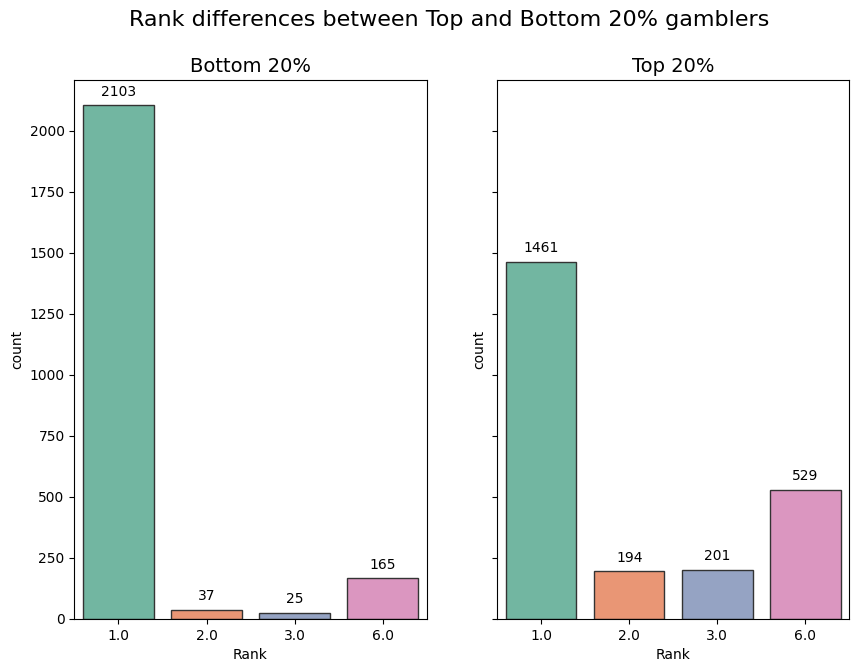

In [10]:
# For every unique rank, print the number of unique players
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('rank')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('rank')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('rank', df_top_20, df_bottom_20, title='Rank', figsize=(10, 7))

### Gender Differences

Number of unique players in bottom 20%:
gender
F    1102
M    1228
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
gender
F    1131
M    1254
Name: playerkey, dtype: int64
--------------------------------------------------


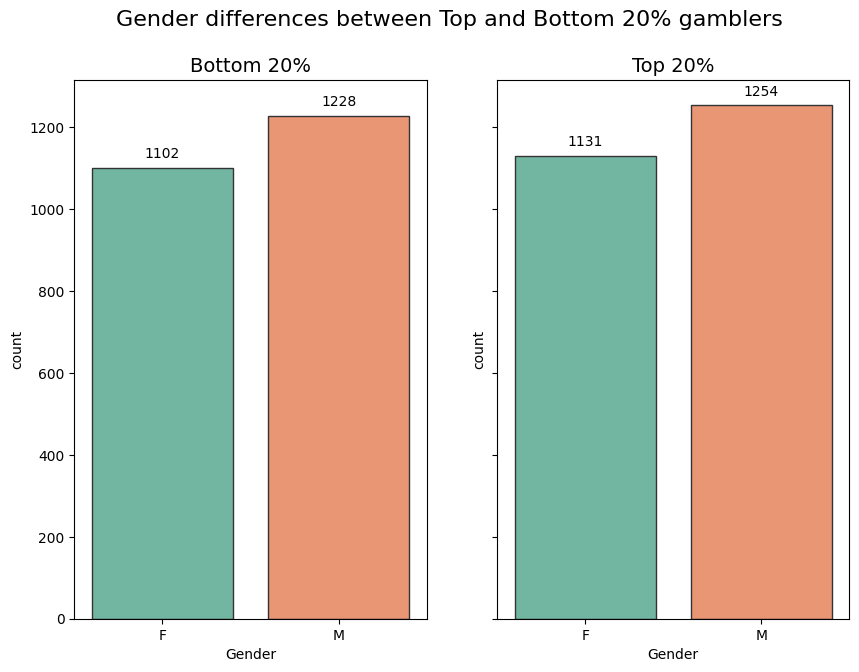

In [11]:
# Gender differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('gender', df_top_20, df_bottom_20, title='Gender', figsize=(10, 7))

### Age Differences

In [12]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for bottom 20% and top 20%
df_bottom_20['age_range'] = pd.cut(df_bottom_20['age'], bins=bins, labels=labels, right=False)
df_bottom_20['age_gen'] = pd.cut(df_bottom_20['age'], bins=bins, labels=generations, right=False)

df_top_20['age_range'] = pd.cut(df_top_20['age'], bins=bins, labels=labels, right=False)
df_top_20['age_gen'] = pd.cut(df_top_20['age'], bins=bins, labels=generations, right=False)

Number of unique players in bottom 20%:
age_range
18-24     87
25-40    888
41-55    710
56-75    613
76+       32
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_range
18-24      10
25-40     403
41-55     865
56-75    1016
76+        91
Name: playerkey, dtype: int64
--------------------------------------------------


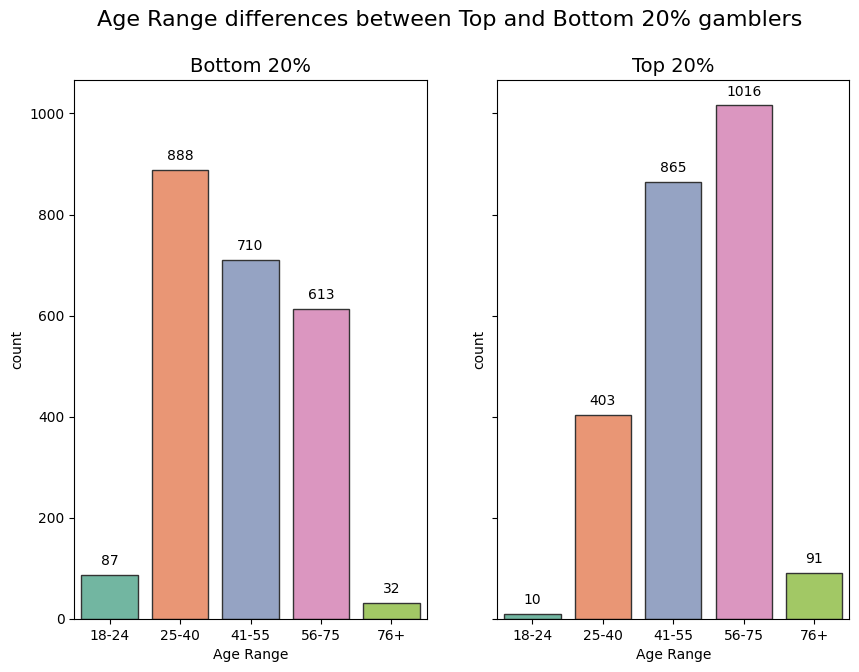

In [13]:
# Age range differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('age_range', df_top_20, df_bottom_20, title='Age Range', figsize=(10, 7))

Number of unique players in bottom 20%:
age_gen
Gen Z            87
Millenials      888
Gen X           710
Baby Boomers    613
Silent           32
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_gen
Gen Z             10
Millenials       403
Gen X            865
Baby Boomers    1016
Silent            91
Name: playerkey, dtype: int64
--------------------------------------------------


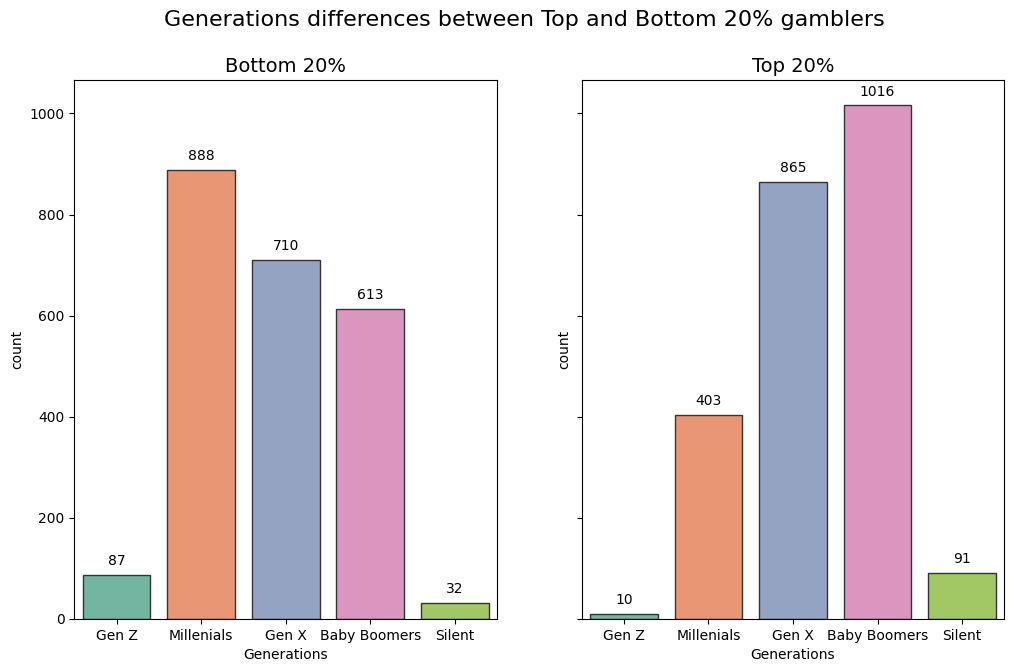

In [14]:
# Age generation differences
print("Number of unique players in bottom 20%:")
print(df_bottom_20.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and bottom 20% gamblers
pf.plot_overall_diff('age_gen', df_top_20, df_bottom_20, title='Generations', figsize=(12, 7))


Male age differences in bottom 20%:
age_range
18-24     37
25-40    505
41-55    361
56-75    308
76+       17
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in bottom 20%:
age_range
18-24     50
25-40    383
41-55    349
56-75    305
76+       15
Name: playerkey, dtype: int64


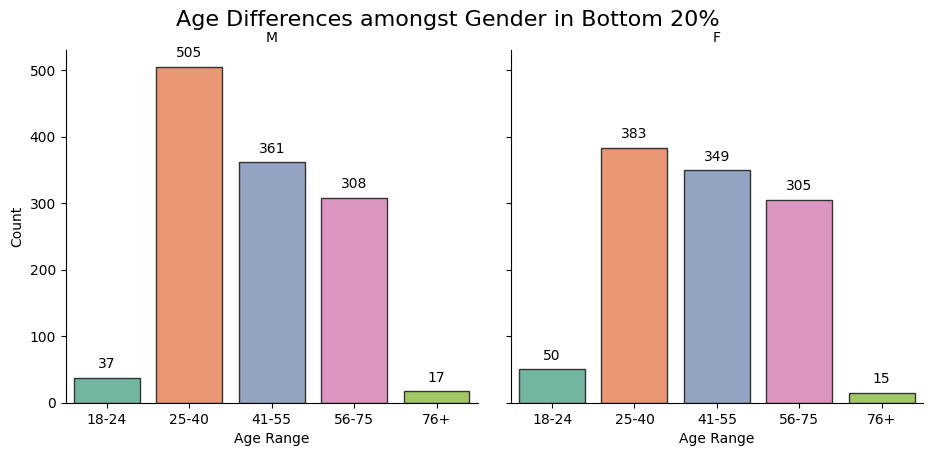

In [15]:
# Age range of male gamblers in bottom 20%
print("Male age differences in bottom 20%:")
print(df_bottom_20[df_bottom_20['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in bottom 20%
print('Female age differences in bottom 20%:')
print(df_bottom_20[df_bottom_20['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df_bottom_20, 'Bottom 20%', figsize=(10, 5))


Male age differences in top 20%:
age_range
18-24      4
25-40    250
41-55    471
56-75    489
76+       40
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in top 20%:
age_range
18-24      6
25-40    153
41-55    394
56-75    527
76+       51
Name: playerkey, dtype: int64
--------------------------------------------------


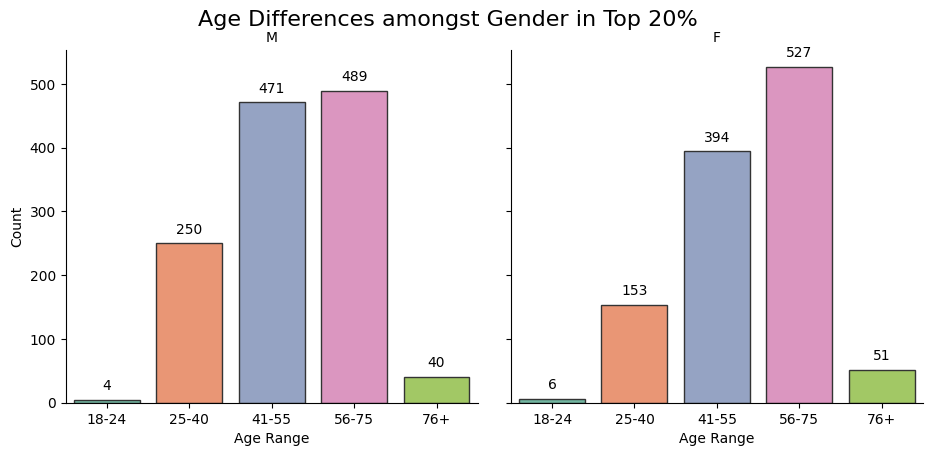

In [16]:
# Age range of male gamblers in top 20%
print("Male age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of female gamblers in top 20%
print("Female age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot gender differences
pf.plot_gender_diff(df_top_20, 'Top 20%', figsize=(10, 5))

### Increse and Decrease of SlotDenomination and Bet

In [17]:
# Lets cound the number of times a player increase slot denominations
players_increase_slot_t20 = cf.count_increase(df_top_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_t20 = cf.count_decrease(df_top_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_t20 = cf.count_increase(df_top_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_t20 = cf.count_decrease(df_top_20, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 1870
Count of times each player increase_slotdeno : {14: 21, 48: 1, 73: 216, 94: 1, 95: 2, 111: 56, 113: 4, 156: 24, 224: 7, 234: 37, 247: 7, 332: 5, 336: 9, 450: 12, 611: 3, 646: 5, 719: 174, 841: 4, 865: 1, 901: 15, 978: 7, 1008: 98, 1029: 3, 1032: 1, 1069: 3, 1113: 118, 1136: 5, 1147: 2, 1166: 73, 1194: 2, 1213: 3, 1233: 5, 1263: 1, 1337: 239, 1371: 7, 1402: 3, 1408: 1, 1438: 1849, 1515: 5, 1553: 2, 1562: 5, 1563: 9, 1599: 27, 1660: 9, 1699: 1, 1715: 12, 1757: 139, 1909: 2, 1932: 1, 1950: 4, 1959: 2, 2004: 10, 2005: 89, 2054: 5, 2067: 4, 2073: 7, 2097: 6, 2155: 2, 2214: 6, 2332: 2, 2341: 3, 2413: 108, 2431: 4, 2459: 8, 2569: 1, 2570: 5, 2595: 4, 2631: 442, 2710: 3, 2736: 7, 2816: 6, 2817: 2, 2819: 30, 2858: 10, 2949: 1, 2981: 3, 2993: 37, 3010: 7, 3115: 3, 3120: 31, 3127: 15, 3231: 2, 3248: 3, 3260: 2, 3265: 5, 3271: 1, 3306: 12, 3359: 4, 3360: 10, 3385: 7, 3634: 16, 3677: 23, 3708: 2, 3711: 2, 3756: 1, 3783: 3, 3840: 3, 3933: 4, 3955: 4, 402

In [18]:
# Lets do the same but for bottom 20%
players_increase_slot_b20 = cf.count_increase(df_bottom_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_b20 = cf.count_decrease(df_bottom_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_b20 = cf.count_increase(df_bottom_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_b20 = cf.count_decrease(df_bottom_20, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 180
Count of times each player increase_slotdeno : {184: 1, 869: 1, 7401: 1, 8092: 1, 8499: 1, 9255: 1, 9713: 1, 13681: 1, 18748: 1, 20635: 1, 21167: 1, 23758: 1, 26876: 1, 28197: 1, 30170: 1, 30198: 1, 30234: 1, 30254: 1, 30336: 1, 30492: 1, 30512: 1, 30573: 1, 30629: 1, 30638: 1, 30927: 2, 30971: 1, 31040: 1, 31099: 1, 31125: 2, 31171: 1, 31263: 1, 31292: 1, 31485: 1, 31497: 1, 31502: 1, 31531: 1, 31584: 1, 31614: 1, 31669: 2, 31697: 1, 31777: 1, 31888: 1, 32134: 1, 32136: 1, 32164: 4, 32313: 1, 32450: 1, 32462: 1, 32581: 1, 32645: 1, 32930: 1, 32945: 1, 32952: 2, 32986: 1, 33090: 1, 33149: 1, 33262: 1, 33308: 1, 33362: 1, 33380: 1, 33388: 10, 33678: 1, 33766: 1, 33825: 1, 33848: 1, 33856: 1, 33897: 1, 34075: 1, 34159: 3, 34187: 2, 34198: 1, 34300: 1, 34439: 2, 34472: 1, 34477: 1, 34574: 1, 34741: 1, 34789: 1, 34827: 1, 34910: 1, 34919: 1, 34978: 1, 35030: 1, 35081: 1, 35083: 1, 35101: 1, 35485: 1, 35509: 1, 35512: 1, 35563: 1, 35614: 2, 35635

### Wealth Differences
#### General

In [19]:
# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df_bottom_20['depletion_rate'] = df_bottom_20.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)
df_top_20['depletion_rate'] = df_top_20.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)


Total amount won or lost by all players in bottom 20%:
-15109.383
Average amount won or lost by each player in bottom 20%:
-6.48
-------------------------------------------------------
Total amount won or lost by all players in top 20%:
94334.875
Average amount won or lost by each player in top 20%:
39.55


Text(0.5, 0, 'Ending Balance')

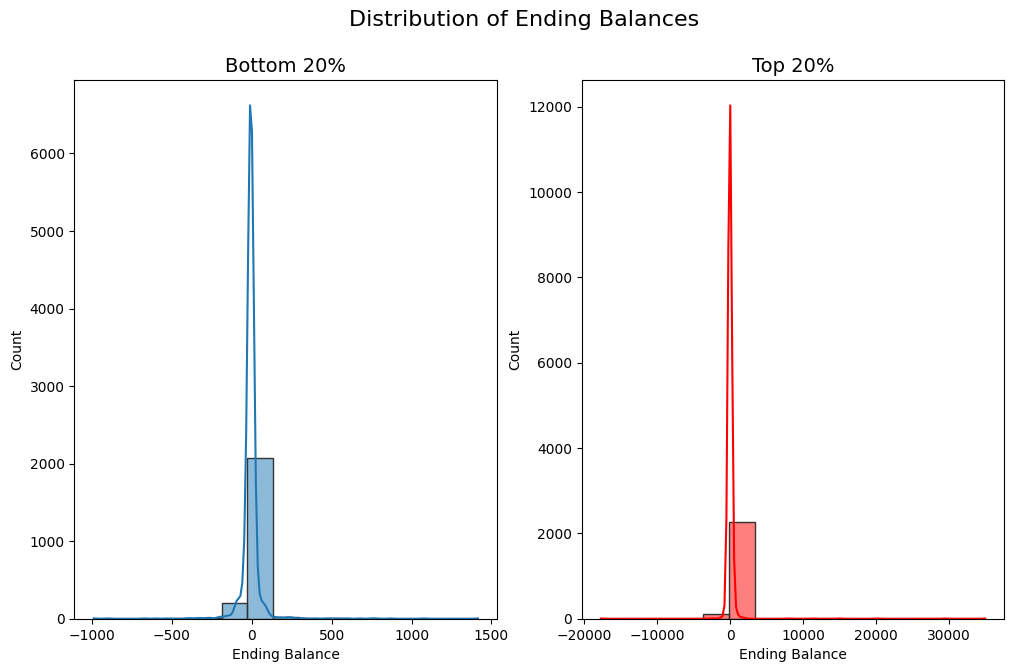

In [20]:
# Total amoun lost or won by all players in bottom 20%
# Group by 'playerkey'
grouped_b = df_bottom_20.groupby('playerkey')

# Calculate the amount won or lost by each player
b_amount_won_lost_each = grouped_b['playercashableamt'].last() - grouped_b['playercashableamt'].first()

# Calculate the total amount won or lost by all players
b_amount_won_lost_total = grouped_b['playercashableamt'].last().sum() - grouped_b['playercashableamt'].first().sum()

# Calculate average amount won or lost by each player
b_amount_won_lost_avg = b_amount_won_lost_total / len(grouped_b)

# Total amoun lost or won by all players in top 20%
# Group by 'playerkey'
grouped_t = df_top_20.groupby('playerkey')

# Calculate the amount won or lost by each player
t_amount_won_lost_each = grouped_t['playercashableamt'].last() - grouped_t['playercashableamt'].first()

# Calculate the total amount won or lost by all players
t_amount_won_lost_total = grouped_t['playercashableamt'].last().sum() - grouped_t['playercashableamt'].first().sum()

# Calculate average amount won or lost by each player
t_amount_won_lost_avg = t_amount_won_lost_total / len(grouped_t)

# Prin Results
print('Total amount won or lost by all players in bottom 20%:')
print(b_amount_won_lost_total)
print('Average amount won or lost by each player in bottom 20%:')
print(round(b_amount_won_lost_avg, 2))
print('-------------------------------------------------------')
print('Total amount won or lost by all players in top 20%:')
print(t_amount_won_lost_total)
print('Average amount won or lost by each player in top 20%:')
print(round(t_amount_won_lost_avg, 2))

# Create figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
# Set Title
fig.suptitle('Distribution of Ending Balances', fontsize=16)
# Plot histogram of amount won or lost by all players in bottom 20%
sns.histplot(b_amount_won_lost_each, ax=ax[0], bins=15, kde=True, edgecolor=".2")
ax[0].set_title('Bottom 20%', fontsize=14)
ax[0].set_xlabel('Ending Balance')

# Plot histogram of amount won or lost by all players in top 20%
sns.histplot(t_amount_won_lost_each, ax=ax[1], bins=15, kde=True, edgecolor=".2", color='red')
ax[1].set_title('Top 20%', fontsize=14)
ax[1].set_xlabel('Ending Balance')

#### Per Visit

In [21]:
# Create dataframe
df_all_v = pf.merge_dfs_per_player(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', print_results=False)

In [22]:
# Simultaneous Play
df_b20_sim_v = pf.simultaneous_play(40000, df_bottom_20, 'visit')
df_t20_sim_v = pf.simultaneous_play(40000, df_top_20, 'visit')

# Concat the two dataframes
df_sim_v = pd.concat([df_b20_sim_v, df_t20_sim_v]).reset_index()

print(df_sim_v)
# Remove repeated instances
df_sim_no_repeat_v = df_sim_v.drop_duplicates(subset=['visit', 'playerkey'])

print(len(df_sim_no_repeat_v))

     index  visit  playerkey
0        0      1      14942
1        1      1      16991
2        2      1      16991
3        3      1      23758
4        4      1      31932
..     ...    ...        ...
901    878     10      29194
902    879     10      29194
903    880     10      29194
904    881     10      29194
905    882     19       1008

[906 rows x 3 columns]
517


In [23]:
# Merge Sim play
df_all_v['sim_play'] = df_all_v[['playerkey', 'visit']].apply(lambda x: tuple(x) in set(map(tuple, df_sim_no_repeat_v[['playerkey', 'visit']].values)), axis=1)

# Eliimante discrepancies
# Print number of unique players
print("Number of unique players in df_all_v: ", df_all_v['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy = df_all_v[df_all_v.isna().any(axis=1)]['playerkey'].unique()

# Print number of players with NaN values
print("Number of players with NaN values: ", len(list_discrepancy))

# Remove discrepancies
df_all_v = df_all_v[~df_all_v['playerkey'].isin(list_discrepancy)]

print(df_all_v.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'visit', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine', 'sim_play','percentile']


df_all_v = df_all_v.reindex(columns=desired_order)

Number of unique players in df_all_v:  4715
Number of players with NaN values:  125
Index(['playerkey', 'visit', 'gender', 'age_range', 'age_gen', 'beginning_amt',
       'ending_amt', 'ending_balance', 'ave_slotdenom', 'std_slotdenom',
       'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'unique_machines', 'ave_time_

##### Distribution Ending Balances

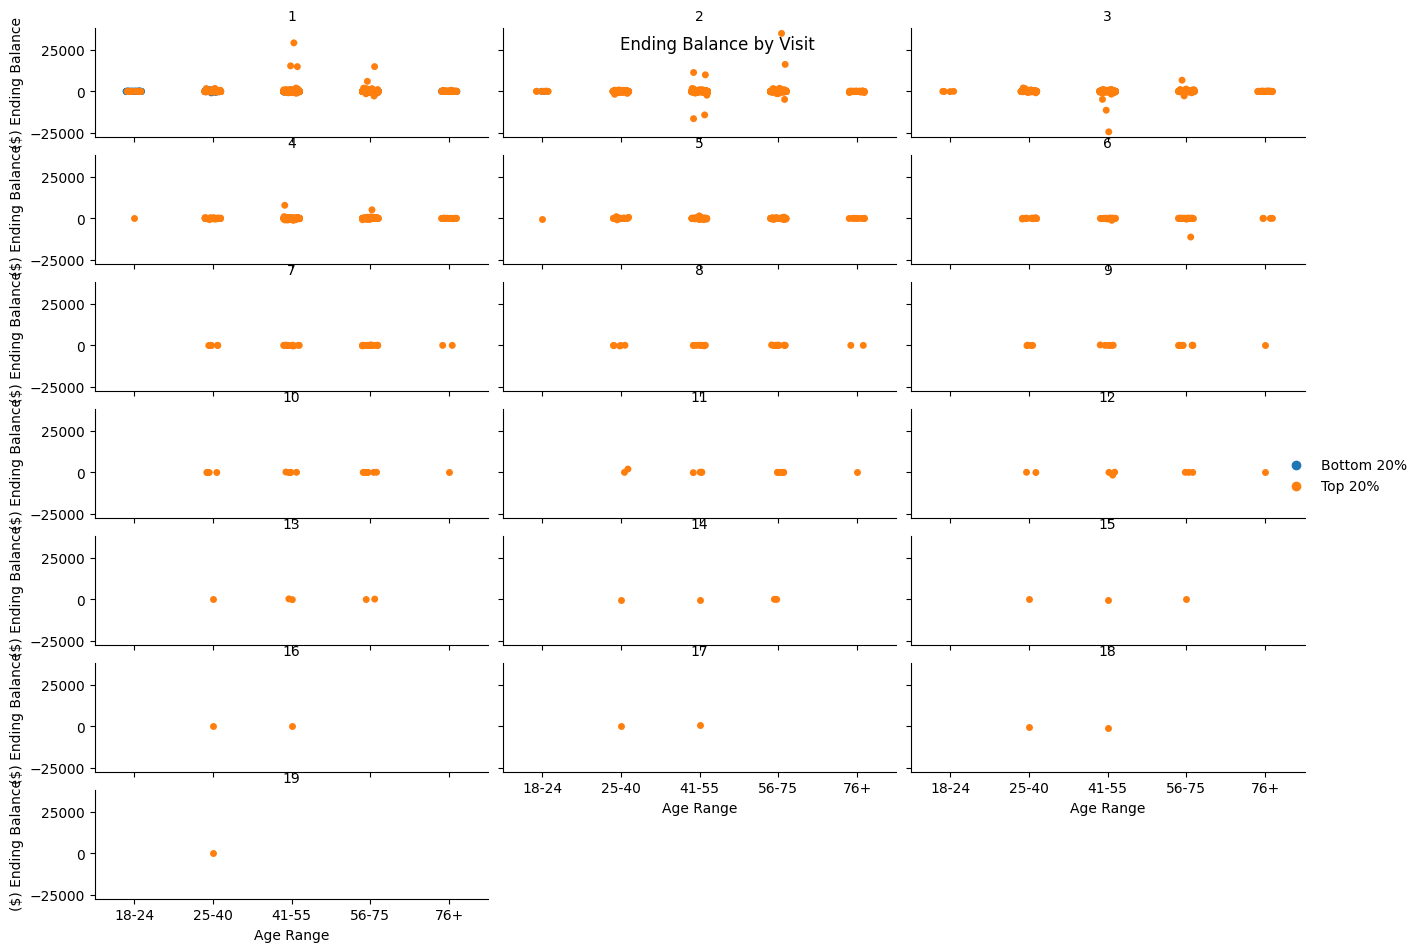

In [24]:
# Save dataframe to paquet file
df_all_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit.parquet')

# print(df_all_v.head(2))

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_v, col='visit', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
f.fig.suptitle('Ending Balance by Visit', fontsize=12)

f.fig.set_size_inches(14, 9)


##### Overall Gains/Loses

In [25]:
# With Outliers Present
combined_data = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
combined_data.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit.parquet')

With Outliers present:
gender  percentile
F       Bottom 20%    -7238.164062
        Top 20%        -786.318115
M       Bottom 20%    -7244.491211
        Top 20%       54967.125000
Name: ending_balance, dtype: float32
-------------------------------------------------------
visit  gender  percentile
1      F       Bottom 20%    -6861.233887
               Top 20%        4284.722168
       M       Bottom 20%    -6745.777344
               Top 20%       94028.312500
2      F       Bottom 20%     -379.929962
               Top 20%       -6174.373047
       M       Bottom 20%     -503.713806
               Top 20%       19147.486328
3      F       Bottom 20%        3.000000
               Top 20%        3223.498779
       M       Bottom 20%        5.000000
               Top 20%      -38615.703125
4      F       Top 20%        1679.941040
       M       Top 20%        -434.165771
5      F       Top 20%        -646.818176
       M       Top 20%       -3744.250488
6      F       Top 20%     

In [26]:
# No Outliers
combined_data_NO = pf.merge_dfs_overall(data_t=df_top_20, data_b=df_bottom_20, grouping='visit', cut_off=cut_off, print_results=True, outliers=False)

# Save to parquet file
combined_data_NO.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit_NO.parquet')

Bottom 20%
Outlier Players with gains greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
Outlier Players with losses greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
[]
-----------------------------------------------------------------
Top 20%
Outlier Players with gains greater than $10,000:
         playerkey  rank age_range gender  ending_balance
432118        3825   3.0     56-75      M         16332.0
823404        9048   3.0     41-55      M         11419.0
975403       10560   3.0     41-55      M         14970.0
1123604      13555   3.0     41-55      M         10014.0
3813053      33614   2.0     41-55      M         29370.0
3817803      33631   3.0     41-55      M         15453.0
8362717      40992   3.0     56-75      M         14975.0
8388368      41038   2.0     56-75      M         35085.0
Outlier Players with losses greater than $10,000:
         playerkey  rank age

#### Per Session

In [27]:
df_all_s = pf.merge_dfs_per_player(data_t=df_top_20_s, data_b=df_bottom_20_s, grouping='session_time', print_results=False)

In [28]:
# Simultaneous Play
df_b20_sim_s = pf.simultaneous_play(40000, df_bottom_20, 'session_time')
df_t20_sim_s = pf.simultaneous_play(40000, df_top_20, 'session_time')

# Concat the two dataframes
df_sim_s = pd.concat([df_b20_sim_s, df_t20_sim_s]).reset_index()

print(df_sim_s)
# Remove repeated instances
df_sim_no_repeat_s = df_sim_s.drop_duplicates(subset=['session_time', 'playerkey'])

print(df_sim_no_repeat_s)

     index  session_time  playerkey
0        0             1      14942
1        1             1      16991
2        2             1      16991
3        3             1      23758
4        4             1      31932
..     ...           ...        ...
985    962             6      36339
986    963             6      36339
987    964             6      37618
988    965             6      37618
989    966             8      34845

[990 rows x 3 columns]
     index  session_time  playerkey
0        0             1      14942
1        1             1      16991
3        3             1      23758
4        4             1      31932
5        5             1      31994
..     ...           ...        ...
983    960             6      32261
984    961             6      35801
985    962             6      36339
987    964             6      37618
989    966             8      34845

[559 rows x 3 columns]


In [29]:
# Merge Sim play
df_all_s['sim_play'] = df_all_s[['playerkey', 'session_time']].apply(lambda x: tuple(x) in set(map(tuple, df_sim_no_repeat_s[['playerkey', 'session_time']].values)), axis=1)

# Eliminate discrepancies
df_all_s = df_all_s[df_all_s['playerkey'].isin(list_discrepancy) == False]

# Eliimante discrepancies
# Print number of unique players
print("Number of unique players in df_all_1min: ", df_all_s['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy = df_all_s[df_all_s.isna().any(axis=1)]['playerkey'].unique()

# Print number of players with NaN values
print("Number of players with NaN values: ", len(list_discrepancy))

# Eliminate discrepancies
df_all_s = df_all_s[df_all_s['playerkey'].isin(list_discrepancy) == False]

print(df_all_s.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine', 'sim_play','percentile']

df_all_s = df_all_s.reindex(columns=desired_order)

Number of unique players in df_all_1min:  4590
Number of players with NaN values:  19
Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'unique_machines', '

##### Distribution Ending Balances

Text(0.5, 0.98, 'Ending Balance by Visit')

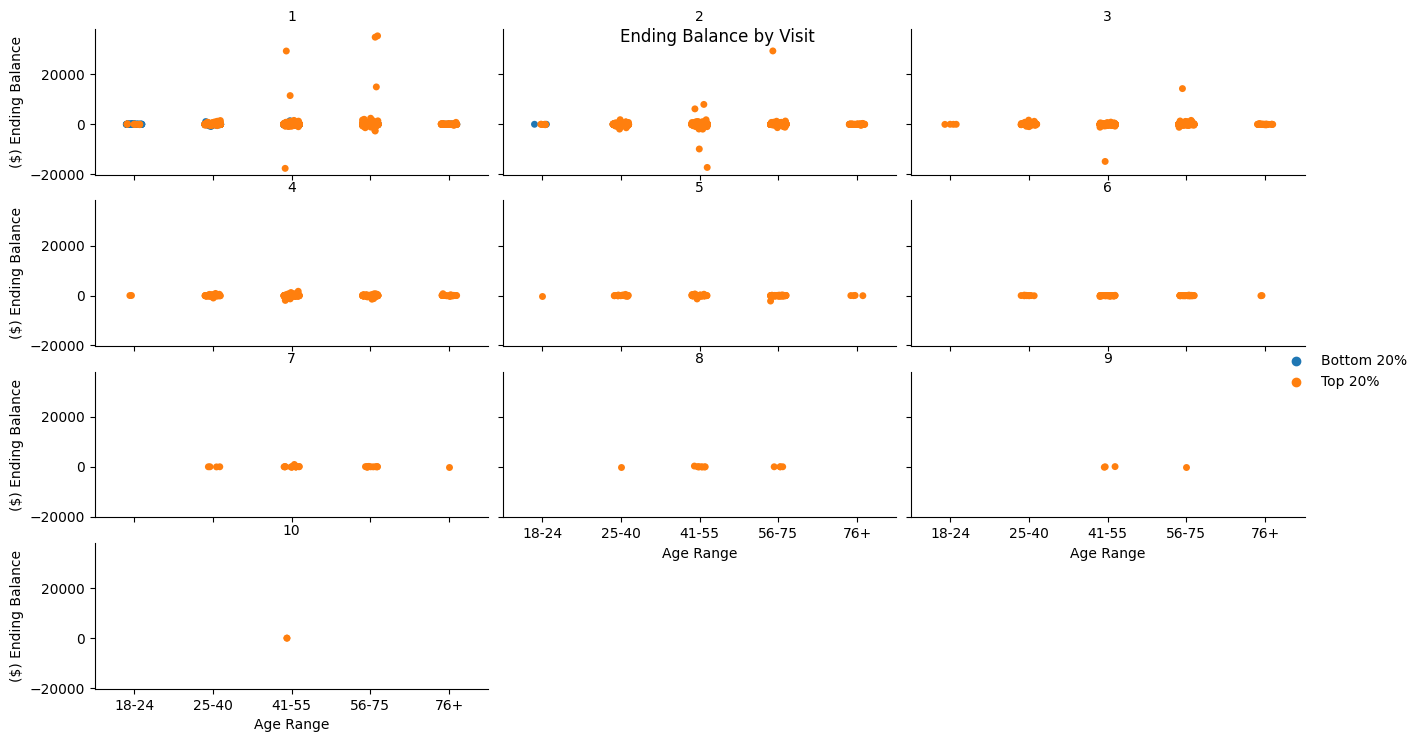

In [30]:
# Save dataframe to paquet file
df_all_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_s, col='session_time', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['Bottom 20%', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
# Set y-axis on a log scale
# f.set(yscale='log')
f.fig.set_size_inches(14, 7)
f.fig.suptitle('Ending Balance by Visit', fontsize=12)


##### Overall Gains/Loses

In [31]:
# With Outliers Present
combined_data_s = pf.merge_dfs_overall(data_t=df_top_20_s, data_b=df_bottom_20_s, grouping='session_time', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
combined_data_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_session.parquet')

With Outliers present:
gender  percentile
F       Bottom 20%    -7964.837891
        Top 20%       -5159.922363
M       Bottom 20%    -8005.147461
        Top 20%       88081.851562
Name: ending_balance, dtype: float32
-------------------------------------------------------
session_time  gender  percentile
1             F       Bottom 20%     -7724.750488
                      Top 20%         -171.287628
              M       Bottom 20%     -7244.891113
                      Top 20%       117003.351562
2             F       Bottom 20%      -240.087616
                      Top 20%         4180.378418
              M       Bottom 20%      -752.256226
                      Top 20%        -6131.792969
3             F       Bottom 20%         0.000000
                      Top 20%        -2935.327881
              M       Bottom 20%        -8.000000
                      Top 20%        -7652.739258
4             F       Top 20%        -3502.213135
              M       Top 20%        -8069